# Trasformasi Matrik
Matriks Transformasi adalah matriks yang mengubah suatu vektor menjadi vektor lain melalui proses perkalian matriks. Matriks transformasi mengubah sistem kartesius dan memetakan koordinat vektor ke koordinat baru.

## Jenis-Jenis Trasformasi Matrik 


1. Translasi (Translation): Mengeser posisi semua titik dalam suatu ruang vektor dengan jarak tertentu dalam arah tertentu. Translasi biasanya diwakili dengan menambahkan vektor translasi ke setiap titik.\
Rumusnya:
$$
\begin{pmatrix}
x^{'} \\
y^{'} 
\end{pmatrix} =
\begin{pmatrix}
x + a \\
y + b 
\end{pmatrix}
$$

2. Rotasi (Rotation): Memutar semua titik dalam ruang vektor di sekitar titik asal atau sumbu tertentu dengan sudut tertentu. Rotasi diwakili oleh matriks rotasi.
$$
\mathbf{R}(\theta) =
\begin{pmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{pmatrix}
$$
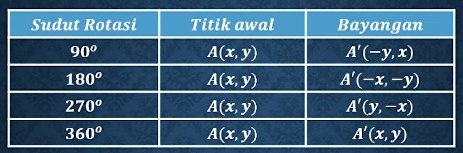

3. Skalasi (Scaling): Mengubah ukuran objek dengan faktor skala tertentu. Skalasi dapat bersifat uniform (seragam) atau non-uniform (tidak seragam).\
Skalasi mengubah ukuran objek dengan faktor skala $ s_x  $ dan $ s_y .$

$$
\mathbf{S} =
\begin{pmatrix}
s_x & 0 \\
0 & s_y
\end{pmatrix}
$$

4. Shearing (Gunting): Menggeser satu bagian dari objek, biasanya dalam satu arah, sehingga bentuk objek berubah. Matriks shearing digunakan untuk transformasi ini.
- Horizontal shearing dengan faktor $ k_x $ :
$$
\mathbf{H}_x =
\begin{pmatrix}
1 & k_x \\
0 & 1
\end{pmatrix}
$$

- Vertical shearing dengan faktor $ k_y $:
$$
\mathbf{H}_y =
\begin{pmatrix}
1 & 0 \\
k_y & 1
\end{pmatrix}
$$

5. Refleksi (Reflection): Memantulkan semua titik dalam ruang vektor terhadap suatu sumbu atau bidang tertentu. Matriks refleksi digunakan untuk operasi ini.\
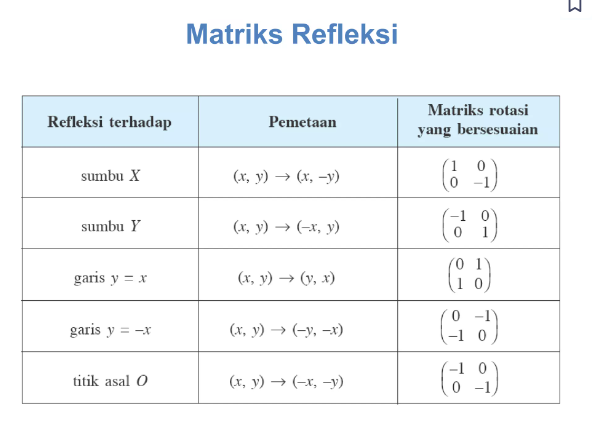

## Contoh Implemantasi di Pyhon 

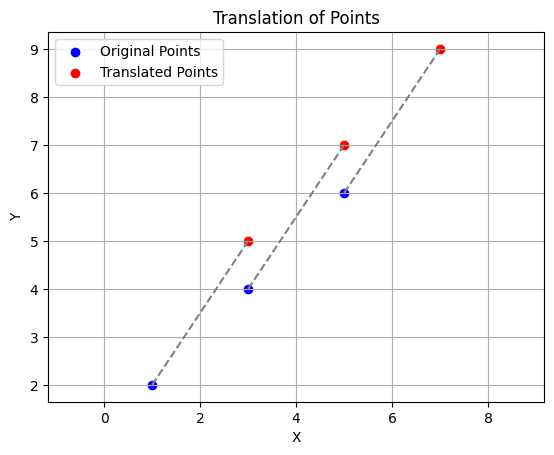

In [1]:
# Translasi Trasformasi
import numpy as np
import matplotlib.pyplot as plt
def translate(points, tx, ty):
    """
    Menerapkan translasi pada titik-titik 2D.

    Parameters:
    points (np.ndarray): Array Nx2 dari titik-titik yang akan ditranslasi.
    tx (float): Jarak translasi di sumbu x.
    ty (float): Jarak translasi di sumbu y.

    Returns:
    np.ndarray: Array Nx2 dari titik-titik yang telah ditranslasi.
    """
    # Buat matriks translasi homogen 3x3
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0,  1]
    ])

    # Tambahkan kolom homogen 1 ke array points
    ones_column = np.ones((points.shape[0], 1))
    homogeneous_points = np.hstack((points, ones_column))

    # Terapkan translasi
    translated_points = homogeneous_points.dot(translation_matrix.T)

    # Kembalikan hanya bagian x dan y dari titik yang ditranslasi
    return translated_points[:, :2]

# Contoh penggunaan
points = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

tx = 2  # Translasi di sumbu x
ty = 3  # Translasi di sumbu y

translated_points = translate(points, tx, ty)

# Plotting
plt.figure()
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Original Points')
plt.scatter(translated_points[:, 0], translated_points[:, 1], color='red', label='Translated Points')

for i in range(points.shape[0]):
    plt.plot([points[i, 0], translated_points[i, 0]], [points[i, 1], translated_points[i, 1]], 'gray', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Translation of Points')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


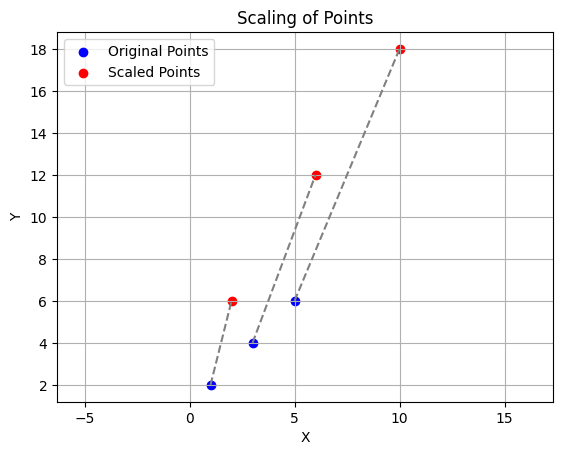

In [2]:
#Skala Trasformasi
import numpy as np
import matplotlib.pyplot as plt

def scale(points, sx, sy):
    """
    Menerapkan skalasi pada titik-titik 2D.

    Parameters:
    points (np.ndarray): Array Nx2 dari titik-titik yang akan diskalasi.
    sx (float): Faktor skalasi di sumbu x.
    sy (float): Faktor skalasi di sumbu y.

    Returns:
    np.ndarray: Array Nx2 dari titik-titik yang telah diskalasi.
    """
    # Buat matriks skalasi homogen 3x3
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

    # Tambahkan kolom homogen 1 ke array points
    ones_column = np.ones((points.shape[0], 1))
    homogeneous_points = np.hstack((points, ones_column))

    # Terapkan skalasi
    scaled_points = homogeneous_points.dot(scaling_matrix.T)

    # Kembalikan hanya bagian x dan y dari titik yang diskalasi
    return scaled_points[:, :2]

# Contoh penggunaan
points = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

sx = 2  # Faktor skalasi di sumbu x
sy = 3  # Faktor skalasi di sumbu y

scaled_points = scale(points, sx, sy)

# Plotting
plt.figure()
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Original Points')
plt.scatter(scaled_points[:, 0], scaled_points[:, 1], color='red', label='Scaled Points')

for i in range(points.shape[0]):
    plt.plot([points[i, 0], scaled_points[i, 0]], [points[i, 1], scaled_points[i, 1]], 'gray', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scaling of Points')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


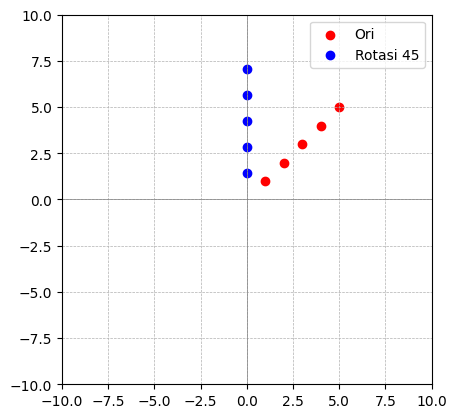

In [3]:
#Rotasi Transformasi
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menggambar sumbu dan grid
def draw_axes_and_grid(ax, lim=10):
    ax.axhline(0, color='grey', linewidth=0.5)
    ax.axvline(0, color='grey', linewidth=0.5)
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(which='both', linestyle='--', linewidth=0.5)

# Fungsi untuk melakukan transformasi matriks
def transform_and_plot(matrix, points, ax, color='blue', label='Transformed'):
    transformed_points = matrix @ points
    ax.scatter(transformed_points[0, :], transformed_points[1, :], color=color, label=label)
    return transformed_points

# Definisi titik-titik (himpunan titik)
points = np.array([
    [1, 2, 3, 4, 5],  # X-koordinat
    [1, 2, 3, 4, 5]   # Y-koordinat
])

# Sudut rotasi dalam derajat
theta_degrees = 45
theta = np.radians(theta_degrees)

# Matriks transformasi untuk rotasi
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Plot hasil transformasi
fig, ax = plt.subplots()
draw_axes_and_grid(ax)
ax.scatter(points[0, :], points[1, :], color='red', label='Ori')
transformed_points = transform_and_plot(rotation_matrix, points, ax, color='blue', label=f'Rotasi {theta_degrees}')

ax.legend()
plt.show()

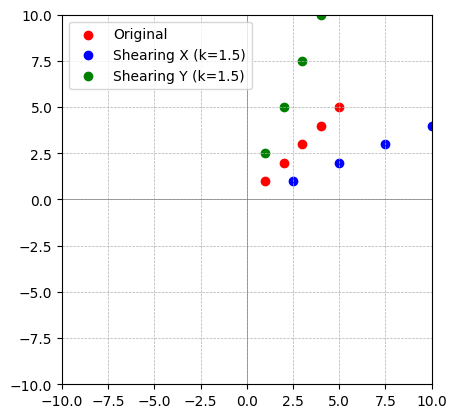

In [4]:
#Shearing Tranformasi
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menggambar sumbu dan grid
def draw_axes_and_grid(ax, lim=10):
    ax.axhline(0, color='grey', linewidth=0.5)
    ax.axvline(0, color='grey', linewidth=0.5)
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(which='both', linestyle='--', linewidth=0.5)

# Fungsi untuk melakukan transformasi matriks
def transform_and_plot(matrix, points, ax, color='blue', label='Transformed'):
    transformed_points = matrix @ points
    ax.scatter(transformed_points[0, :], transformed_points[1, :], color=color, label=label)
    return transformed_points

# Definisi titik-titik (himpunan titik)
points = np.array([
    [1, 2, 3, 4, 5],  # X-koordinat
    [1, 2, 3, 4, 5]   # Y-koordinat
])

# Faktor shearing
k = 1.5

# Matriks transformasi untuk shearing pada sumbu X
shearing_matrix_x = np.array([
    [1, k],
    [0, 1]
])

# Matriks transformasi untuk shearing pada sumbu Y
shearing_matrix_y = np.array([
    [1, 0],
    [k, 1]
])

# Plot hasil transformasi
fig, ax = plt.subplots()
draw_axes_and_grid(ax)
ax.scatter(points[0, :], points[1, :], color='red', label='Original')

# Shearing pada sumbu X
transformed_points_x = transform_and_plot(shearing_matrix_x, points, ax, color='blue', label=f'Shearing X (k={k})')

# Shearing pada sumbu Y
transformed_points_y = transform_and_plot(shearing_matrix_y, points, ax, color='green', label=f'Shearing Y (k={k})')

ax.legend()
plt.show()

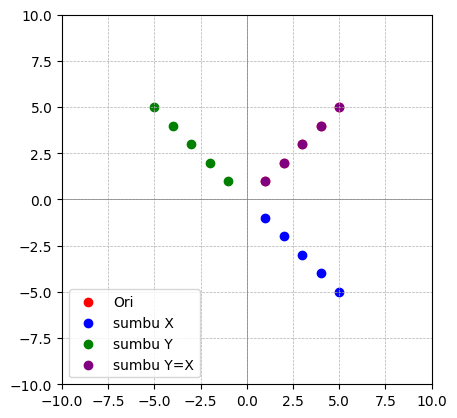

In [5]:
#refleksi transformasi
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menggambar sumbu dan grid
def draw_axes_and_grid(ax, lim=10):
    ax.axhline(0, color='grey', linewidth=0.5)
    ax.axvline(0, color='grey', linewidth=0.5)
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(which='both', linestyle='--', linewidth=0.5)

# Fungsi untuk melakukan transformasi matriks
def transform_and_plot(matrix, points, ax, color='blue', label='Transfor'):
    transformed_points = matrix @ points
    ax.scatter(transformed_points[0, :], transformed_points[1, :], color=color, label=label)
    return transformed_points

# Definisi titik-titik (himpunan titik)
points = np.array([
    [1, 2, 3, 4, 5],  # X-koordinat
    [1, 2, 3, 4, 5]   # Y-koordinat
])

# Matriks transformasi untuk refleksi terhadap sumbu x
reflection_matrix = np.array([
    [1, 0],
    [0, -1]
])

# Plot hasil transformasi
fig, ax = plt.subplots()
draw_axes_and_grid(ax)
ax.scatter(points[0, :], points[1, :], color='red', label='Ori')
transformed_points = transform_and_plot(reflection_matrix, points, ax, color='blue', label='sumbu X')

# Ulangi dengan matriks transformasi lain untuk refleksi terhadap sumbu y dan garis y = x
reflection_matrix_y = np.array([
    [-1, 0],
    [0, 1]
])
transform_and_plot(reflection_matrix_y, points, ax, color='green', label='sumbu Y')

reflection_matrix_yx = np.array([
    [0, 1],
    [1, 0]
])
transform_and_plot(reflection_matrix_yx, points, ax, color='purple', label='sumbu Y=X')

ax.legend()
plt.show()